# In This Notebook:

## 1. Overview of 2023 Flight Data
## 2. General Statistics
## 3. Temporal Analysis
## 4. Geospatial Analysis
## 5. Tail Number Analysis
## 6. Aggregation and Grouping (Wrangling)

In [1]:
#Import Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Set Path

path = r'D:\Data Analytics\Flight Delay Analysis'

In [3]:
# Import 2023 Flight Data Set

df = pd.read_csv(os.path.join(path, '01 - Data', 'flights2023.csv'), index_col = 0)

C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_11752\395996206.py:3: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, '01 - Data', 'flights2023.csv'), index_col = 0)


## 1. Overview of 2023 Flight Data

In [4]:
df.shape

(7278739, 66)

In [5]:
df.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Flight_Date,Marketing_Airline_Network,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,...,Distance,Distance_Group,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Duplicate,Missing_Due_To_Cancellation,Airline
0,2023,1,1,22,7,2023-01-22,B6,20409,B6,1447,...,1032.0,5,NaN,NaN,NaN,NaN,NaN,N,False,JetBlue Airways
1,2023,1,1,22,7,2023-01-22,B6,20409,B6,1451,...,1121.0,5,39.0,0.0,1.0,0.0,14.0,N,False,JetBlue Airways
2,2023,1,1,22,7,2023-01-22,B6,20409,B6,1453,...,1046.0,5,7.0,0.0,16.0,0.0,0.0,N,False,JetBlue Airways
3,2023,1,1,22,7,2023-01-22,B6,20409,B6,1454,...,1046.0,5,NaN,NaN,NaN,NaN,NaN,N,False,JetBlue Airways
4,2023,1,1,22,7,2023-01-22,B6,20409,B6,1455,...,399.0,2,NaN,NaN,NaN,NaN,NaN,N,False,JetBlue Airways


In [6]:
df.tail()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Flight_Date,Marketing_Airline_Network,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,...,Distance,Distance_Group,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Duplicate,Missing_Due_To_Cancellation,Airline
7278734,2023,4,12,26,2,2023-12-26,AA,19805,AA,3201,...,451.0,2,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.
7278735,2023,4,12,24,7,2023-12-24,UA,19977,UA,5641,...,391.0,2,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.
7278736,2023,4,12,24,7,2023-12-24,UA,19977,UA,5658,...,266.0,2,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.
7278737,2023,4,12,24,7,2023-12-24,UA,19977,UA,5710,...,372.0,2,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.
7278738,2023,4,12,25,1,2023-12-25,AA,19805,AA,3053,...,404.0,2,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.


In [7]:
# Display the column names to verify

print("DF DataFrame Columns:", df.columns)

DF DataFrame Columns: Index(['Year', 'Quarter', 'Month', 'Day_of_Month', 'Day_of_Week',
       'Flight_Date', 'Marketing_Airline_Network', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'Origin_Airport_ID',
       'Origin_Airport_Seq_ID', 'Origin_City_Market_ID', 'Origin',
       'Origin_City_Name', 'Origin_State', 'Origin_State_Fips',
       'Origin_State_Name', 'Dest_Airport_ID', 'Dest_Airport_Seq_ID',
       'Dest_City_Market_ID', 'Dest', 'Dest_City_Name', 'Dest_State',
       'Dest_State_Fips', 'Dest_State_Name', 'CRS_Dep_Time', 'Dep_Time',
       'Dep_Delay', 'Dep_Delay_Minutes', 'Dep_Del_15',
       'Departure_Delay_Groups', 'Dep_Time_Blk', 'Taxi_Out', 'Wheels_Off',
       'Wheels_On', 'Taxi_In', 'CRS_Arr_Time', 'Arr_Time', 'Arr_Delay',
       'Arr_Delay_Minutes', 'Arr_Del_15', 

## 2. General Statistics

In [8]:
df.describe()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,Origin_Airport_ID,...,Actual_Elapsed_Time,Air_Time,Flights,Distance,Distance_Group,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
count,7278739.0,7.278739e+06,7.278739e+06,7.278739e+06,7.278739e+06,7.278739e+06,7.278739e+06,7.278739e+06,7.278739e+06,7.278739e+06,...,7.167044e+06,7.167044e+06,7278739.0,7.278739e+06,7.278739e+06,1.464538e+06,1.464538e+06,1.464538e+06,1.464538e+06,1.464538e+06
mean,2023.0,2.527666e+00,6.582403e+00,1.575623e+01,3.984591e+00,1.982583e+04,2.445479e+03,1.996021e+04,2.445323e+03,1.265250e+04,...,1.374550e+02,1.118204e+02,1.0,8.069266e+02,3.700208e+00,2.518661e+01,3.725532e+00,1.246655e+01,1.441472e-01,2.821761e+01
std,0.0,1.108873e+00,3.409988e+00,8.775435e+00,2.002282e+00,2.854154e+02,1.672992e+03,3.756192e+02,1.672803e+03,1.524679e+03,...,7.205324e+01,7.005943e+01,0.0,5.939432e+02,2.331762e+00,7.749963e+01,3.230816e+01,3.099103e+01,3.643842e+00,6.401358e+01
min,2023.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,...,1.500000e+01,6.000000e+00,1.0,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2023.0,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,1.095000e+03,1.979000e+04,1.095000e+03,1.129200e+04,...,8.500000e+01,6.100000e+01,1.0,3.720000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2023.0,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,2.141000e+03,1.993000e+04,2.141000e+03,1.288900e+04,...,1.200000e+02,9.400000e+01,1.0,6.470000e+02,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,2023.0,4.000000e+00,1.000000e+01,2.300000e+01,6.000000e+00,1.997700e+04,3.566000e+03,2.036800e+04,3.565000e+03,1.402700e+04,...,1.680000e+02,1.410000e+02,1.0,1.044000e+03,5.000000e+00,2.300000e+01,0.000000e+00,1.600000e+01,0.000000e+00,3.200000e+01
max,2023.0,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.043600e+04,9.887000e+03,2.050000e+04,9.887000e+03,1.686900e+04,...,7.950000e+02,7.240000e+02,1.0,5.095000e+03,1.100000e+01,5.764000e+03,1.860000e+03,1.708000e+03,1.460000e+03,3.581000e+03


In [9]:
# Calculate general statistics for delays and cancellations
delay_stats = df[['Dep_Delay', 'Arr_Delay', 'Cancelled', 'Diverted']].describe()
print(delay_stats)

          Dep_Delay     Arr_Delay     Cancelled      Diverted
count  7.188579e+06  7.167044e+06  7.278739e+06  7.278739e+06
mean   1.220588e+01  6.633514e+00  1.290017e-02  2.445066e-03
std    5.584222e+01  5.756657e+01  1.128440e-01  4.938713e-02
min   -9.900000e+01 -1.190000e+02  0.000000e+00  0.000000e+00
25%   -6.000000e+00 -1.500000e+01  0.000000e+00  0.000000e+00
50%   -2.000000e+00 -6.000000e+00  0.000000e+00  0.000000e+00
75%    9.000000e+00  9.000000e+00  0.000000e+00  0.000000e+00
max    5.764000e+03  5.780000e+03  1.000000e+00  1.000000e+00


In [10]:
# Identify the most common delay reasons and cancellation codes
common_delays = df[['Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']].sum()
print(common_delays)

Carrier_Delay          36886747.0
Weather_Delay           5456183.0
NAS_Delay              18257737.0
Security_Delay           211109.0
Late_Aircraft_Delay    41325768.0
dtype: float64


In [11]:
common_cancellation_codes = df['Cancellation_Code'].value_counts()
print(common_cancellation_codes)

Cancellation_Code
B    52562
A    25952
C    15169
D      214
Name: count, dtype: int64


## 3. Temporal Analysis

In [12]:
# Analyze delays and cancellations by day of the week

delays_by_day = df.groupby('Day_of_Week')[['Dep_Delay', 'Arr_Delay']].mean()
print(delays_by_day)

             Dep_Delay  Arr_Delay
Day_of_Week                      
1            12.318091   6.581511
2             9.453530   3.231957
3            10.932974   5.350741
4            12.138233   7.227493
5            13.503872   8.480247
6            12.476461   6.314656
7            14.441678   8.958059


In [13]:
cancellations_by_day = df.groupby('Day_of_Week')['Cancelled'].sum()
print(cancellations_by_day)

Day_of_Week
1    13914.0
2    13171.0
3    16171.0
4    12114.0
5    12949.0
6    10316.0
7    15262.0
Name: Cancelled, dtype: float64


In [14]:
# Analyze delays and cancellations by month
delays_by_month = df.groupby('Month')[['Dep_Delay', 'Arr_Delay']].mean()
print(delays_by_month)

       Dep_Delay  Arr_Delay
Month                      
1      13.013436   7.943178
2      10.198311   4.339568
3      12.912066   8.858804
4      13.711005   9.210841
5      10.094421   3.995882
6      18.736636  14.356334
7      21.070933  16.566318
8      14.008362   8.294823
9      10.790381   5.368516
10      7.522233   1.193401
11      5.821481  -1.272484
12      8.275701   0.523800


In [15]:
cancellations_by_month = df.groupby('Month')['Cancelled'].sum()
print(cancellations_by_month)

Month
1     11032.0
2      9686.0
3      7847.0
4     10323.0
5      3833.0
6     12856.0
7     15875.0
8      9475.0
9      7492.0
10     2189.0
11      827.0
12     2462.0
Name: Cancelled, dtype: float64


In [16]:
# Analyze delays and cancellations by quarter

delays_by_quarter = df.groupby('Quarter')[['Dep_Delay', 'Arr_Delay']].mean()
print(delays_by_quarter)

         Dep_Delay  Arr_Delay
Quarter                      
1        12.104094   7.153260
2        14.158321   9.149587
3        15.348302  10.132530
4         7.215222   0.168519


In [17]:
cancellations_by_quarter = df.groupby('Quarter')['Cancelled'].sum()
print(cancellations_by_quarter)

Quarter
1    28565.0
2    27012.0
3    32842.0
4     5478.0
Name: Cancelled, dtype: float64


## 4. Geospatial Analysis

In [18]:
# Determine the origin and destination airports with the highest delays and cancellations

origin_delays = df.groupby('Origin_City_Name')[['Dep_Delay', 'Arr_Delay']].mean().sort_values(by='Dep_Delay', ascending=False)
print(origin_delays.head(10))

                       Dep_Delay  Arr_Delay
Origin_City_Name                           
Santa Maria, CA        61.537736  67.132075
Pago Pago, TT          37.338710  36.556452
Bishop, CA             31.144033  16.759336
Concord, NC            29.997337  28.873333
Decatur, IL            28.710445  23.375519
Sault Ste. Marie, MI   28.675105  17.180282
Martha's Vineyard, MA  28.012750  22.376838
Niagara Falls, NY      26.371257  23.066465
Aguadilla, PR          25.532981  20.548604
Stockton, CA           25.354597  29.500938


In [19]:
destination_delays = df.groupby('Dest_City_Name')[['Dep_Delay', 'Arr_Delay']].mean().sort_values(by='Arr_Delay', ascending=False)
print(destination_delays.head(10))

                          Dep_Delay  Arr_Delay
Dest_City_Name                                
Provo, UT                 39.841126  38.477227
Santa Maria, CA           29.896226  33.894231
Ponce, PR                 31.952734  27.963585
Cody, WY                  26.242119  25.345269
Aguadilla, PR             28.985227  24.750619
Presque Isle/Houlton, ME  21.525084  23.045531
Sanford, FL               21.999558  20.209956
Trenton, NJ               23.997259  19.457275
Owensboro, KY             24.046512  19.023256
Hancock/Houghton, MI      21.313433  18.172989


In [20]:
# Identify the airlines with the highest delays and cancellations
airline_delays = df.groupby('Airline')[['Dep_Delay', 'Arr_Delay']].mean().sort_values(by='Dep_Delay', ascending=False)
print(airline_delays)

                                           Dep_Delay  Arr_Delay
Airline                                                        
JetBlue Airways                            24.506903  18.470392
Frontier Airlines Inc.                     22.273641  18.190160
Mesa Airlines Inc.                         21.753946  15.383493
Spirit Air Lines                           19.567319  14.659304
American Airlines Inc.                     17.539570  12.302476
Air Wisconsin Airlines Corp                16.775603  12.470326
Allegiant Air                              15.409526  14.139436
United Air Lines Inc.                      12.608338   6.328434
Southwest Airlines Co.                     11.717483   5.804964
Delta Air Lines Inc.                       10.359360   2.406470
Hawaiian Airlines Inc.                      9.623788   9.768693
Commutair Aka Champlain Enterprises, Inc.   9.352092   5.609532
SkyWest Airlines Inc.                       8.852334   4.491085
GoJet Airlines, LLC d/b/a United Express

In [21]:
airline_cancellations = df.groupby('Airline')['Cancelled'].sum().sort_values(ascending=False)
print(airline_cancellations)

Airline
Southwest Airlines Co.                       14325.0
United Air Lines Inc.                        10270.0
Delta Air Lines Inc.                         10016.0
American Airlines Inc.                        9978.0
SkyWest Airlines Inc.                         8186.0
Republic Airlines                             8160.0
JetBlue Airways                               5763.0
Spirit Air Lines                              4486.0
Endeavor Air Inc.                             4233.0
Frontier Airlines Inc.                        3774.0
Comair Inc.                                   2461.0
Envoy Air                                     2193.0
Alaska Airlines Inc.                          1977.0
Mesa Airlines Inc.                            1767.0
GoJet Airlines, LLC d/b/a United Express      1474.0
Hawaiian Airlines Inc.                        1053.0
Commutair Aka Champlain Enterprises, Inc.     1027.0
Air Wisconsin Airlines Corp                    797.0
Allegiant Air                         

## 5. Tail Number Analysis

In [22]:
# Check if specific aircraft tail numbers are more prone to delays or cancellations
tail_number_delays = df.groupby('Tail_Number')[['Dep_Delay', 'Arr_Delay']].mean().sort_values(by='Dep_Delay', ascending=False)
print(tail_number_delays.head(10))

              Dep_Delay   Arr_Delay
Tail_Number                        
N669UA       319.000000  317.000000
N923SW       211.538462  204.230769
NZ52AW       113.222222  118.481481
SS1          106.285714  111.642857
N8932C        91.608696   84.652174
N533NK        81.656250   76.312500
N665UA        81.500000   63.750000
N825NW        75.909091   69.909091
N829NW        74.500000   64.191489
N410DZ        72.672131   67.032787


In [23]:
tail_number_cancellations = df.groupby('Tail_Number')['Cancelled'].sum().sort_values(ascending=False)
print(tail_number_cancellations.head(10))

Tail_Number
Unknown    19648.0
N355JB        74.0
N649RW        72.0
N731YX        72.0
N794SK        68.0
N748YX        66.0
N740YX        66.0
N904XJ        65.0
N249JB        64.0
N306JB        63.0
Name: Cancelled, dtype: float64


## 6. Aggregation and Grouping (Wrangling)

In [24]:
# Group by various metrics to gain insights
grouped_by_airline = df.groupby('Airline').agg({
    'Dep_Delay': 'mean',
    'Arr_Delay': 'mean',
    'Cancelled': 'sum'
}).sort_values(by='Dep_Delay', ascending=False)
print(grouped_by_airline)

                                           Dep_Delay  Arr_Delay  Cancelled
Airline                                                                   
JetBlue Airways                            24.506903  18.470392     5763.0
Frontier Airlines Inc.                     22.273641  18.190160     3774.0
Mesa Airlines Inc.                         21.753946  15.383493     1767.0
Spirit Air Lines                           19.567319  14.659304     4486.0
American Airlines Inc.                     17.539570  12.302476     9978.0
Air Wisconsin Airlines Corp                16.775603  12.470326      797.0
Allegiant Air                              15.409526  14.139436      782.0
United Air Lines Inc.                      12.608338   6.328434    10270.0
Southwest Airlines Co.                     11.717483   5.804964    14325.0
Delta Air Lines Inc.                       10.359360   2.406470    10016.0
Hawaiian Airlines Inc.                      9.623788   9.768693     1053.0
Commutair Aka Champlain E

In [25]:
grouped_by_airport = df.groupby('Origin_City_Name').agg({
    'Dep_Delay': 'mean',
    'Arr_Delay': 'mean',
    'Cancelled': 'sum'
}).sort_values(by='Dep_Delay', ascending=False)
print(grouped_by_airport)

                  Dep_Delay  Arr_Delay  Cancelled
Origin_City_Name                                 
Santa Maria, CA   61.537736  67.132075        1.0
Pago Pago, TT     37.338710  36.556452        0.0
Bishop, CA        31.144033  16.759336       14.0
Concord, NC       29.997337  28.873333       13.0
Decatur, IL       28.710445  23.375519       19.0
...                     ...        ...        ...
Yakutat, AK       -2.813584  -3.443465       33.0
Saipan, TT        -3.664935  -4.041558        7.0
Butte, MT         -5.702703 -14.995495        8.0
Gustavus, AK      -5.813333  -4.853333        0.0
Deadhorse, AK     -8.400000  -7.353960       10.0

[353 rows x 3 columns]


In [26]:
# Import Seaborn for Visualizations

import seaborn as sns

In [27]:
# Ensure that Flight Date is in datetime format

df['Flight_Date'] = pd.to_datetime(df['Flight_Date'])
df_2023 = df[df['Flight_Date'].dt.year == 2023]

In [28]:
# Set save path for saving visuals

save_path = os.path.join(path, '03 - Visuals')

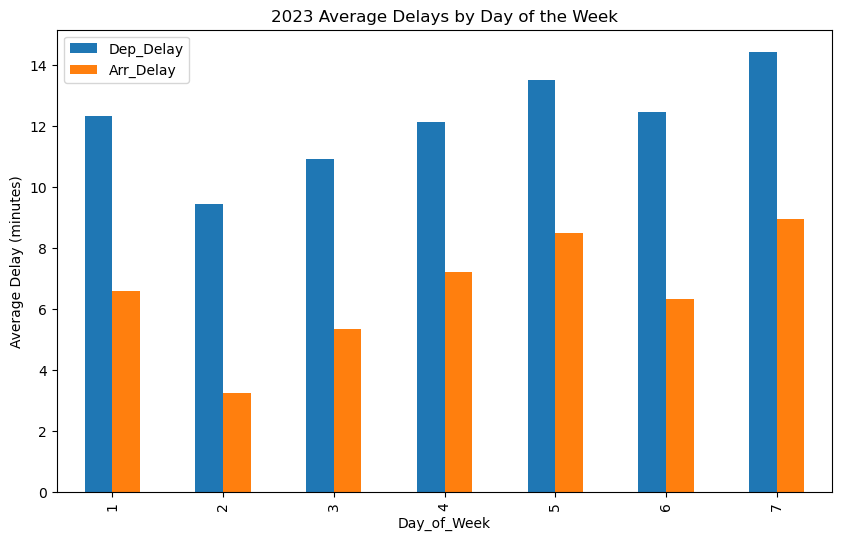

In [29]:
# Delays by Day of the Week
delays_by_day = df_2023.groupby('Day_of_Week')[['Dep_Delay', 'Arr_Delay']].mean()
delays_by_day.plot(kind='bar', figsize=(10, 6), title='2023 Average Delays by Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.savefig(f'{save_path}delays_by_day_of_week_2023.png')
plt.show()

In [30]:
delays_by_quarter = df_2023.groupby('Quarter')[['Dep_Delay', 'Arr_Delay']].mean()

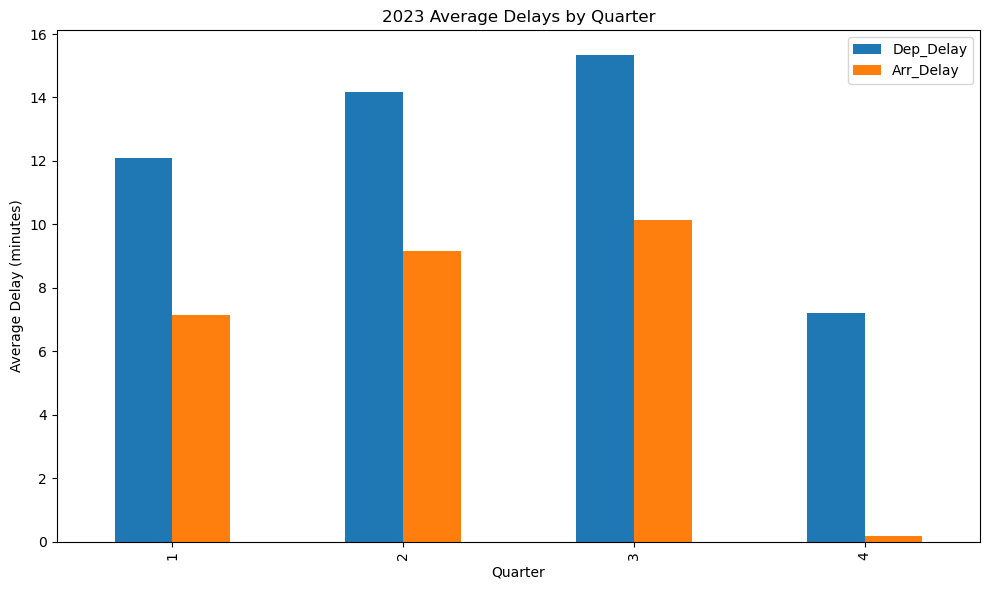

In [31]:
# Plot the delays by quarter
delays_by_quarter.plot(kind='bar', figsize=(10, 6), title='2023 Average Delays by Quarter')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Quarter')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig(f'{save_path}delays_by_quarter_2023.png')
plt.show()

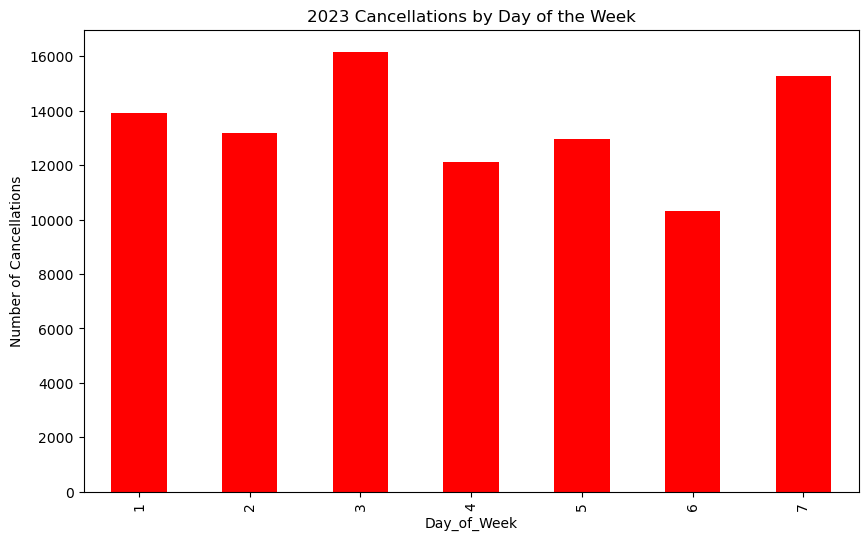

In [32]:
# Cancellations by Day of the Week
cancellations_by_day = df_2023.groupby('Day_of_Week')['Cancelled'].sum()
ax = cancellations_by_day.plot(kind='bar', figsize=(10, 6), title='2023 Cancellations by Day of the Week', color='red')
plt.ylabel('Number of Cancellations')
plt.savefig(f'{save_path}cancellations_by_day_of_week_2023.png')
plt.show()

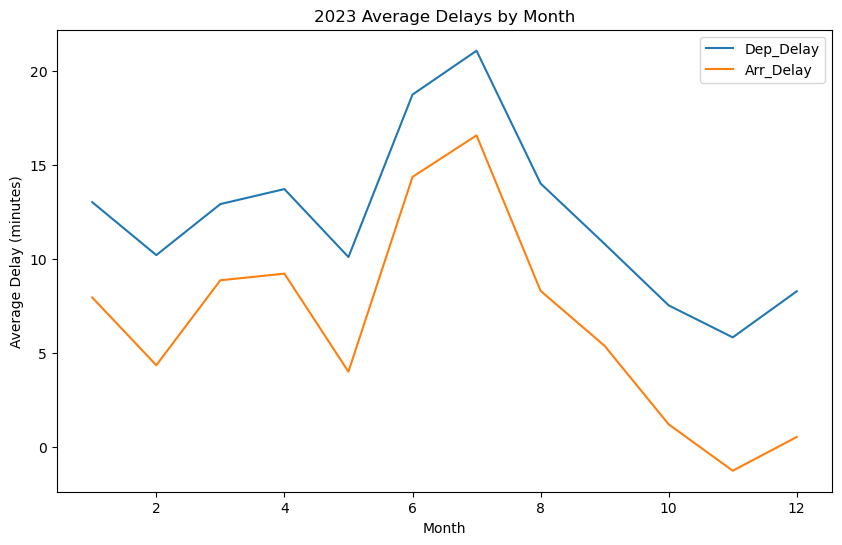

In [33]:
# Monthly Trends
delays_by_month = df_2023.groupby('Month')[['Dep_Delay', 'Arr_Delay']].mean()
ax = delays_by_month.plot(kind='line', figsize=(10, 6), title='2023 Average Delays by Month')
plt.ylabel('Average Delay (minutes)')
plt.savefig(f'{save_path}delays_by_month_2023.png')
plt.show()

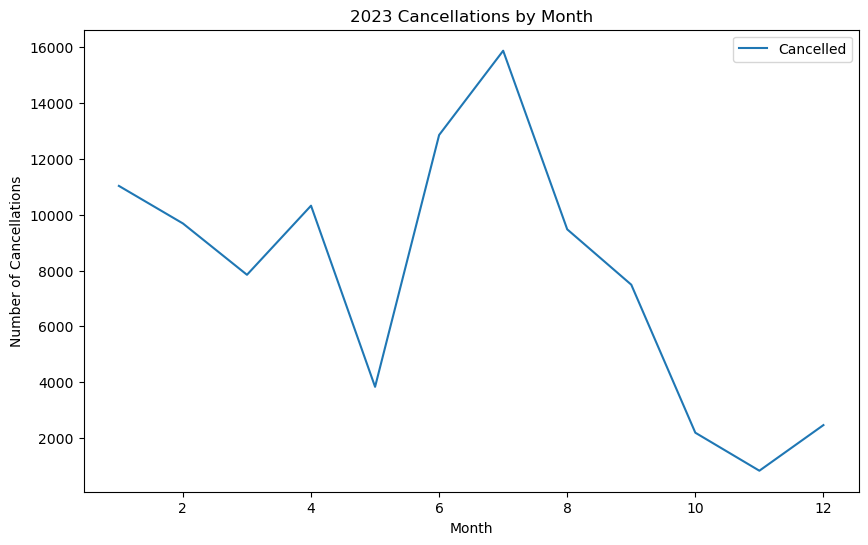

In [34]:
# Monthly Cancellation Trends
cancellations_by_month = df_2023.groupby('Month')[['Cancelled']].sum()
ax = cancellations_by_month.plot(kind='line', figsize=(10, 6), title='2023 Cancellations by Month')
plt.ylabel('Number of Cancellations')
plt.savefig(f'{save_path}cancellations_by_month_2023.png')
plt.show()

In [35]:
# Dictionary mapping abbreviations to full names
airline_mapping = {
    'AA': 'American Airlines Inc.',
    'AS': 'Alaska Airlines Inc.',
    'B6': 'JetBlue Airways',
    'DL': 'Delta Air Lines Inc.',
    'F9': 'Frontier Airlines Inc.',
    'G4': 'Allegiant Air',
    'HA': 'Hawaiian Airlines Inc.',
    'NK': 'Spirit Air Lines',
    'UA': 'United Airlines Inc.',
    'VX': 'Virgin America',
    'WN': 'Southwest Airlines Co.'
}

In [36]:
# Add a new column with full names
df_2023['Marketing_Airline_Network_Full'] = df_2023['Marketing_Airline_Network'].map(airline_mapping)

In [37]:
# Rename columns
df_2023 = df_2023.rename(columns={
    'Marketing_Airline_Network': 'Marketing_Airline_Network_Code',
    'Marketing_Airline_Network_Full': 'Marketing_Airline_Network'
})

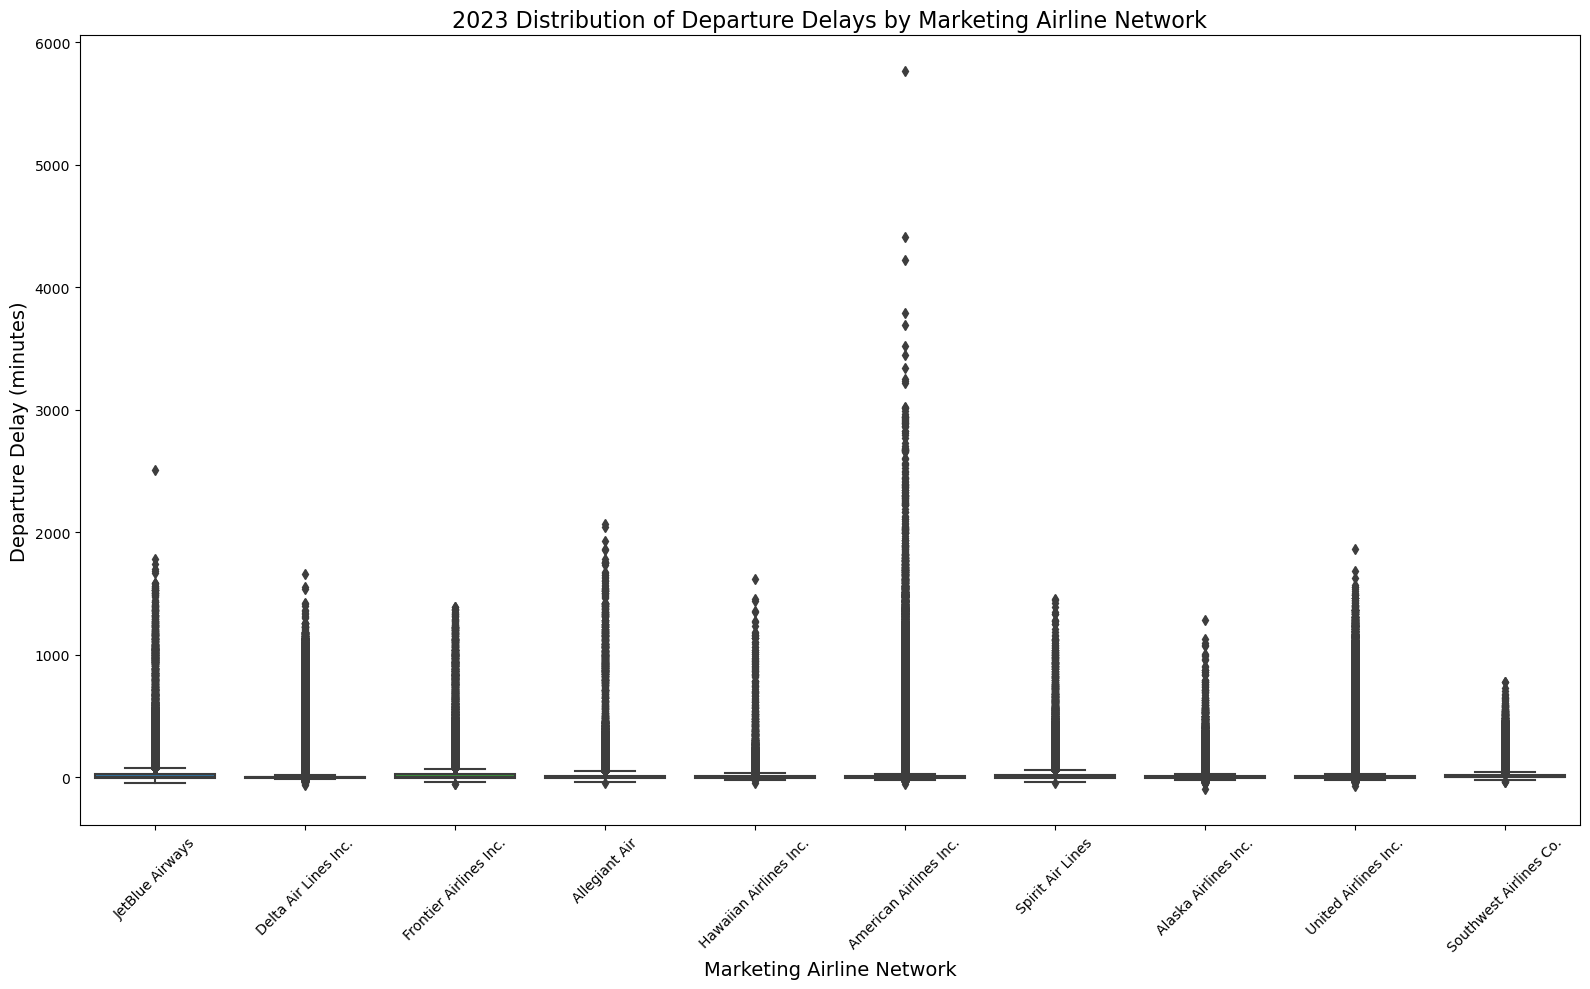

In [38]:
# Distribution of Delays by Marketing Airline Network
plt.figure(figsize=(16, 10))  # Increase the width and height of the figure
sns.boxplot(x='Marketing_Airline_Network', y='Dep_Delay', data=df_2023)
plt.title('2023 Distribution of Departure Delays by Marketing Airline Network', fontsize=16)
plt.ylabel('Departure Delay (minutes)', fontsize=14)
plt.xlabel('Marketing Airline Network', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate labels and adjust font size
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig(f'{save_path}delays_by_airline_network_boxplot_2023.png')
plt.show()

## I will be using Tableau for further Geospatial Analsysis.

In [39]:
# Count the number of flights per month using the existing 'Month' column
flights_per_month = df_2023['Month'].value_counts().sort_index()

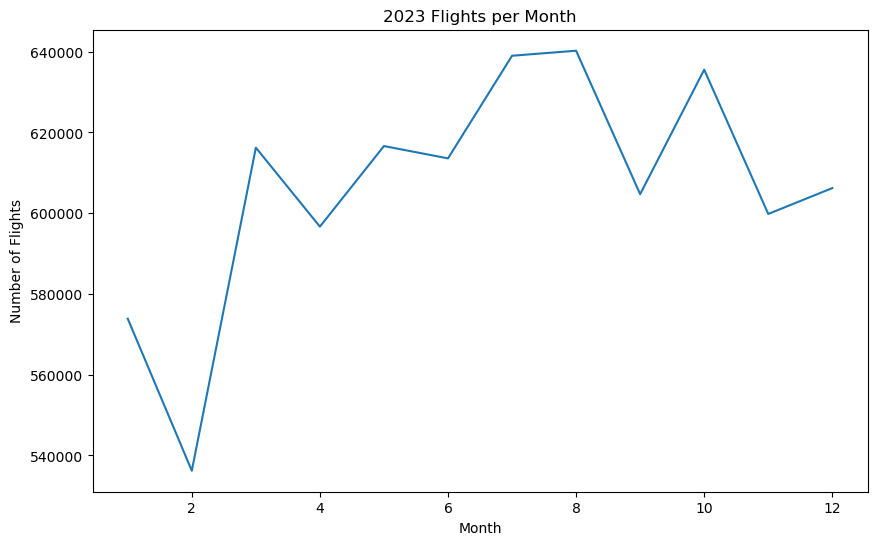

In [40]:
# Plot the line chart

ax = flights_per_month.plot(kind='line', figsize=(10, 6), title='2023 Flights per Month')
plt.ylabel('Number of Flights')
plt.savefig(f'{save_path}flights_per_month_2023.png')
plt.show()

In [41]:
# Save 2023 flights dataframe, now with Marketing_Airline_Network & Marketing_Airline_Network_Code columns

df_2023.to_csv(os.path.join(path, 'flights2023.csv'))